In [ ]:
import statsmodels.api as sm

# Определение зависимой и независимых переменных
X = df[['Age', 'Experience', 'CreditCard']]
y = df['Income']

# Добавление константы к независимым переменным
X = sm.add_constant(X)

# Построение модели OLS
model = sm.OLS(y, X).fit()

# Вывод результатов модели
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     15.37
Date:                Wed, 17 May 2023   Prob (F-statistic):           5.98e-10
Time:                        07:58:25   Log-Likelihood:                -26218.
No. Observations:                5000   AIC:                         5.244e+04
Df Residuals:                    4996   BIC:                         5.247e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        156.7728     13.428     11.675      0.0

const         156.772848
Age            -3.121451
Experience      2.915249
CreditCard     -0.295738
dtype: float64


/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


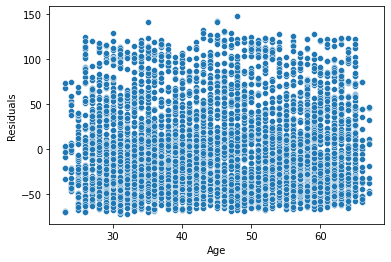

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Интерпретация коэффициентов
print(model.params)

# Построение графика остатков
residuals = model.resid
sns.scatterplot(df['Age'], residuals)
plt.xlabel('Age')
plt.ylabel('Residuals')
plt.show()

const         156.772848
Age            -3.121451
Experience      2.915249
CreditCard     -0.295738
dtype: float64


/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


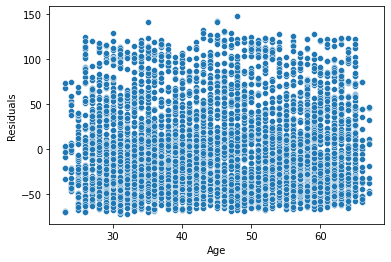

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Интерпретация коэффициентов
print(model.params)

# Построение графика остатков
residuals = model.resid
sns.scatterplot(df['Age'], residuals)
plt.xlabel('Age')
plt.ylabel('Residuals')
plt.show()

In [67]:
TSS = sum((y - y.mean())**2)
RSS = sum(model.resid**2)
ESS = TSS - RSS

# Вычисление стандартной ошибки
se = model.bse

# Вычисление R^2 и R^2adj
R_squared = ESS / TSS
R_squared_adj = 1 - (1 - R_squared) * ((len(y) - 1) / (len(y) - X.shape[1] - 1))

# Вывод результатов
print("TSS:", TSS)
print("RSS:", RSS)
print("ESS:", ESS)
print("Standard Errors:", se)
print("R^2:", R_squared)
print("R^2 adjusted:", R_squared_adj)

TSS: 10593402.07180001
RSS: 10496552.141417352
ESS: 96849.9303826578
Standard Errors: const           13.427686
Age              0.526565
Experience       0.526350
CreditCard       0.474325
CreditCard_1     0.474325
CreditCard_1     0.474325
dtype: float64
R^2: 0.009142476583653475
R^2 adjusted: 0.007951780581150425


In [71]:
# Значимость переменных
print(model.pvalues)

# Фильтрация по бинарной переменной
binary_filter = df['Experience'] == 1
filtered_data = df[binary_filter]




const           4.303752e-31
Age             3.273194e-09
Experience      3.204900e-08
CreditCard      8.353696e-01
CreditCard_1    8.353696e-01
CreditCard_1    8.353696e-01
dtype: float64


In [73]:
# Определение зависимой и независимых переменных
X_full = df[['Age', 'Experience', 'CreditCard']]
X_reduced = df[['Age', 'Experience']]
y = df['Income']

# Добавление константы к независимым переменным
X_full = sm.add_constant(X_full)
X_reduced = sm.add_constant(X_reduced)

# Оценка полной и урезанной моделей
model_full = sm.OLS(y, X_full).fit()
model_reduced = sm.OLS(y, X_reduced).fit()

# Вычисление суммы квадратов ошибок
SSE_full = model_full.ssr
SSE_reduced = model_reduced.ssr

# Вычисление статистики F-теста
df_full = model_full.df_resid
df_reduced = model_reduced.df_resid
F_value = ((SSE_reduced - SSE_full) / (df_reduced - df_full)) / (SSE_full / df_full)

# Получение результатов F-теста
f_test_results = anova_lm(model_reduced, model_full)
print(f_test_results)
print('F-value:', F_value)

   df_resid           ssr  df_diff    ss_diff         F   Pr(>F)
0    4997.0  1.049664e+07      0.0        NaN       NaN      NaN
1    4996.0  1.049655e+07      1.0  90.749387  0.043194  0.83537
F-value: 0.04319360577465368


In [75]:
# Доверительные интервалы для коэффициентов
confidence_intervals = model.conf_int
print(confidence_intervals)

<bound method RegressionResults.conf_int of <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f220ad17340>>


In [91]:


import pandas as pd
import statsmodels.api as sm

# Создание новых данных для прогноза
X_new = pd.DataFrame({'Age': [22], 'Experience': [0], 'CreditCard': [1]})

# Добавление константы к новым данным
X_new = sm.add_constant(X_new)

# Прогнозирование значений зависимой переменной
y_pred = model.predict(X_new)
print(y_pred)


ValueError: shapes (1,3) and (6,) not aligned: 3 (dim 1) != 6 (dim 0)

не понимаю почему не срабатывает

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Добавление константы к независимым переменным
X = sm.add_constant(X)

# Расчет VIF для каждой независимой переменной
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


       Variable         VIF
0         const  429.089715
1           Age   86.690465
2    Experience   86.692322
3    CreditCard         inf
4  CreditCard_1         inf
5  CreditCard_1         inf


/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [93]:
# Создание дамми-переменных
dummy_variables = pd.get_dummies(df['CreditCard'], prefix='CreditCard', drop_first=True)
X = pd.concat([X, dummy_variables], axis=1)

In [94]:


# Оценка модели
model = smf.ols(formula='Income ~ Age + Experience + CreditCard', data=df).fit()

# Проверка на гетероскедастичность с использованием теста Уайта
het_white = model.white_test()
print(het_white)


AttributeError: 'OLSResults' object has no attribute 'white_test'

In [95]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white

# Оценка модели
model = sm.OLS(y, X).fit()

# Проверка на гетероскедастичность с использованием теста Уайта
white_test = het_white(model.resid, model.model.exog)
print(white_test)

(25.42727115614152, 0.0013153743346743015, 3.188904787853967, 0.001297823269054949)


In [96]:
import statsmodels.api as sm

# Оценка модели
model = sm.OLS(y, X).fit()

# Проверка на серийную корреляцию с использованием теста Дарбина-Уотсона
serial_corr = sm.stats.stattools.durbin_watson(model.resid)
print(serial_corr)

1.9978817199690402
